In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Compute C2 analytically for a uniform spherical shell

### NB: Why does mu run from -1 to 1 here and only 0,1 in my code??

In [39]:
R1=500;
R2=2000; # sphere inner/outer radii in Mpc
nbin = 10; # radial bins
mbin = 6; # mu bins
xi_0 = 100; # correlation function normalization
N_particles = 1e6;

In [41]:
Vol = np.pi*4./3.*(R2**3.-R1**3.)
n = float(N_particles)/Vol # no. density

In [42]:
mu_max = lambda r,s: (r**2.+s**2.-R2**2.)/(2.*r*s)
mu_min = lambda r,s: (R1**2.-r**2.-s**2.)/(2.*r*s)

In [44]:
s_low = 50.+(200.-50.)/float(nbin)*(np.arange(nbin)) # lower boundary of radial bins
s_high = s_low+(200.-50.)/nbin
mu_low = np.arange(mbin)/float(mbin)
mu_high = mu_low + 1./mbin

In [57]:
from scipy.integrate import dblquad
def C2_integral(S1,S2,mu1,mu2):
    def X1_integrand(r,s,mu1,mu2):
        mumin = mu_min(r,s)
        muA=max([mu1,mumin])
        muB=max([mu2,mumin])
        return r**2.*(muB-muA)*(xi_0+s**2.)
    X1_int = dblquad(X1_integrand,S1,S2,R1,lambda s: R1+s,args=(mu1,mu2))[0]
    
    def X2_integrand(r,s,mu1,mu2):
        return r**2.*(mu2-mu1)*(xi_0+s**2.)
    X2_int = dblquad(X2_integrand,S1,S2,lambda s: R1+s,lambda s: R2-s,args=(mu1,mu2))[0]
    
    def X3_integrand(r,s,mu1,mu2):
        mumax=mu_max(r,s)
        muA = min([mu1,mumax])
        muB = min([mu2,mumax])
        return r**2.*(muB-muA)*(xi_0+s**2.)
    X3_int = dblquad(X3_integrand,S1,S2,lambda s: R2-s,R2,args=(mu1,mu2))[0]
    
    return 8.*np.pi**2.*n**2.*(X1_int+X2_int+X3_int)

In [74]:
C2_analyt=[];index=0
for i in range(len(s_low)):
    for j in range(len(mu_low)):
        # Keep same indexing as code:
        tmp_int=C2_integral(s_low[i],s_high[i],mu_low[j],mu_high[j])
        C2_analyt.append(2.*tmp_int/(RR_true[index]**2.))
        index+=1

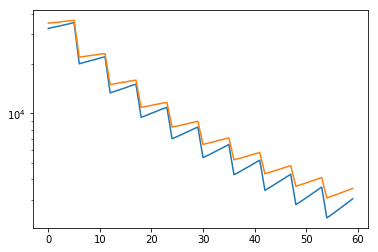

In [81]:
plt.plot(C2_analyt)
plt.plot(c2_est*1e17)
plt.yscale('log')

In [76]:
c2_est = np.loadtxt('../CovMatricesAll_untrunc/c2_n10_m6_full.txt')

In [70]:
rr_true_file = '../weight_files/binned_pair_counts_n10_m6_j48.dat'
RR_true = np.loadtxt(rr_true_file)